# This is a classifier to predict if a credit card transaction is fraudulent or not.

In [ ]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the credit card transaction data
card=pd.read_csv('creditcard.csv')
print(card.shape)
print(card.Class.value_counts())
card.head()

(284807, 31)
0    284315
1       492
Name: Class, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Classifier using only amount data.

In [3]:
#split the data into testing and training data
x = card.Amount.values.reshape(-1,1)
y = card.Class.values
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.5, random_state=0)

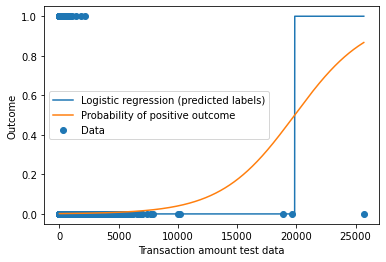

In [4]:
# call regression frunction
card_lr = LogisticRegression(penalty='none',max_iter=10000)
#fit the data
Card_lr= card_lr.fit(xtrain,ytrain)

#make predictions using test data
yhatt = Card_lr.predict(xtest)
#probability of positve outcome (fraud occurring)
yhat_probs = Card_lr.predict_proba(xtest)

#create new x vector to input into classifier
xx=np.linspace(0,max(xtest),len(xtest))
x_x=np.reshape(xx,(-1,1))

#make predictions using classifier
ytest_hat = Card_lr.predict(x_x)
ytest_probs = Card_lr.predict_proba(x_x)

# plots
plt.scatter(xtest, ytest, label='Data')
plt.plot(x_x,ytest_hat, label='Logistic regression (predicted labels)')
plt.plot(x_x,ytest_probs[:,1], label='Probability of positive outcome') #using [:,1] because the second columns is positive outcomes
plt.xlabel('Transaction amount test data')
plt.ylabel('Outcome')
plt.legend()

In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    positive=tp+fp
    print(positive)
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

#compute criteria:
compute_performance(ytest_hat,ytest,Card_lr.classes_)

# determine probability of positive outcome for a data point
result = np.where(ytest_hat == 1)
first=result[0][0]
first_pos=ytest_probs[first]
print('The positive index value chosen had a probability of {}'.format(first_pos[1]))

tp: 49 tn: 109862 fp: 32299 fn: 194
32348
Accuracy: 0.772 Recall: 0.202 Precision: 0.002 Sensitivity: 0.202 Specificity: 0.773
The positive index value chosen had a probability of 0.5000109962772663


# Code to classify a positive outcome using all data, not just the amount data.

In [6]:
#name variables
x2 = card.drop('Class', axis='columns').values
y2 = card.Class.values

#split data
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2, test_size=0.5, random_state=0)

#initialize the logistic regression model
card_lr2 = LogisticRegression(penalty='none',solver='lbfgs',max_iter=10000)

#fit the credit card data
Card_lr2 = card_lr2.fit(xtrain2,ytrain2)
#make predictions
yhat2 = Card_lr2.predict(xtest2)
#probabilities
yhat_probs2 = Card_lr2.predict_proba(xtest2)
probs2=yhat_probs2[:,1]

In [7]:
compute_performance(yhat2,ytest2,Card_lr2.classes_)

tp: 147 tn: 142128 fp: 33 fn: 96
180
Accuracy: 0.999 Recall: 0.605 Precision: 0.817 Sensitivity: 0.605 Specificity: 1.0


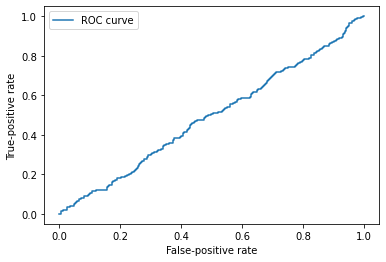

The area under the PRC curve is 0.4897759084545741


In [8]:
# ROC for Amount-only classifier
fpr1, tpr1, _ = roc_curve(ytest, ytest_probs[:,1], pos_label=1)

plt.plot(fpr1,tpr1, label='ROC curve')
plt.xlabel('False-positive rate')
plt.ylabel('True-positive rate')
plt.legend()
plt.show()

# AUROC
auroc1=auc(fpr1,tpr1)
print('The area under the PRC curve is {}'.format(auroc1))

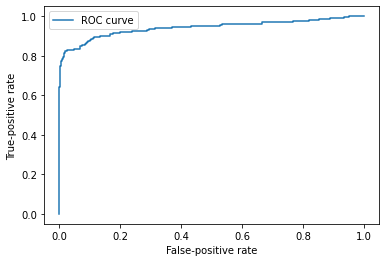

The area under the ROC curve is 0.9419281847686575


In [9]:
# ROC for all-variable classifier
fpr2, tpr2, _ = roc_curve(ytest2, yhat_probs2[:,1], pos_label=1)
plt.plot(fpr2,tpr2, label='ROC curve')
plt.xlabel('False-positive rate')
plt.ylabel('True-positive rate')
plt.title('True-positive rate')
plt.legend()
plt.show()

# AUROC
auroc2=auc(fpr2,tpr2)
print('The area under the ROC curve is {}'.format(auroc2))